In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
 
# создаем датафрейм, берем данные из iris.data и название столбцов из iris.feature_names
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
 
# смотрим первые пять значений
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# посмотрим на размерность
iris_df.shape

(150, 4)

In [5]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [6]:
# импортируем необходимый класс из модуля preprocessing библиотеки sklearn
from sklearn.preprocessing import StandardScaler
 
# создадим объект этого класса
scaler = StandardScaler()
 
# приведем данные к единому масштабу 
iris_scaled = scaler.fit_transform(iris_df)
 
# заново создадим датафрейм с нормализованными значениями
iris_df_scaled = pd.DataFrame(iris_scaled, columns = iris.feature_names)
 
# посмотрим на первые пять строк
iris_df_scaled.round(2).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.90,1.02,-1.34,-1.32
1,-1.14,-0.13,-1.34,-1.32
2,-1.39,0.33,-1.40,-1.32
3,-1.51,0.10,-1.28,-1.32
4,-1.02,1.25,-1.34,-1.32


In [7]:
# оставим все признаки и для наглядности поместим наши данные в переменную Х
# целевой переменной у нас разумеется нет
X = iris_df_scaled

C:\Users\nudan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WCSS')

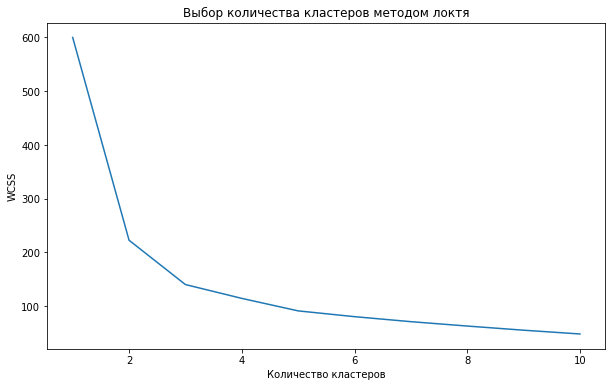

In [8]:
# импортируем нужный класс
from sklearn.cluster import KMeans
 
# создадим пустой список для записи показателя WCSS (нашей ошибки)
wcss = []
 
# воспользуемся новой для нас функцией range(), она возвращает последовательность чисел
# в данном случае числа от 1 до 10
for i in range(1, 11):
    
    # настроим параметры модели (подробнее об этом расскажу чуть дальше)
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
 
    # обучим модель на наших данных с разным количеством кластеров
    kmeans.fit(X)
 
    # для каждого кластера рассчитаем ошибку (атрибут inertia_) и поместим в список
    wcss.append(kmeans.inertia_)
 
# зададим размер график
plt.figure(figsize = (10,6))
# передадим функции plot() последовательность кластеров и ошибку WCSS
plt.plot(range(1, 11), wcss)
# и добавим подписи
plt.title('Выбор количества кластеров методом локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')

In [9]:
# заново обучим модель с тремя кластерами
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)


In [10]:
# обучение и прогноз в данном случае можно сделать одним методом .fit_predict()
y_pred = kmeans.fit_predict(X)

In [21]:
# поместим переменные в словарь
d = {'Target' : iris.target, 'Prediction' : y_pred}
 
# превратим словарь в датафрейм с соответствующими названиями столбцов
df = pd.DataFrame(d, columns = ['Target', 'Prediction'])
df

,Target,Prediction
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
145,2,0
146,2,2
147,2,0
148,2,0


In [27]:

comparison = np.where(df['Target'] == df['Prediction'], True, False)
print(type(comparison))
print(comparison[:5])

<class 'numpy.ndarray'>
[False False False False False]


In [20]:
result = df
result['Comparison'] = pd.DataFrame(comparison)
result.head()

,Target,Prediction,Comparison
0,0,1,False
1,0,1,False
2,0,1,False
3,0,1,False
4,0,1,False


In [23]:

result['Comparison'].value_counts(normalize = True).round(2)

False    0.91
True     0.09
Name: Comparison, dtype: float64

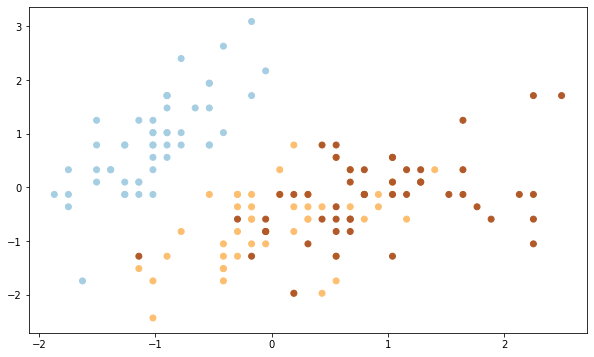

In [24]:
# зададим размер
plt.figure(figsize = (10,6))
 
# возьмем первый и второй столбцы с помощью функции iloc()
# параметр с задаст каждой точке определенный код (0, 1, 2), а
# camp определит цвет каждой из точек
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = iris.target, cmap = 'Paired')

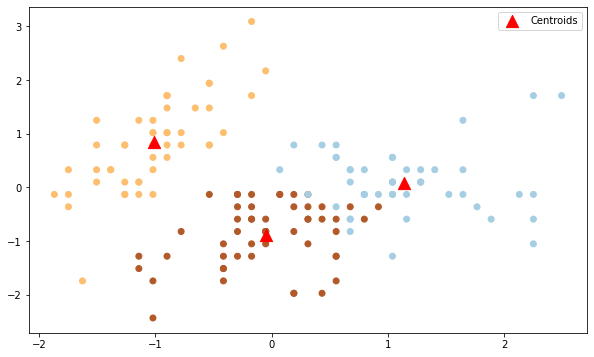

In [25]:
plt.figure(figsize = (10,6))
 
# снова построим точечную диаграмму, но коды точек возьмем из y_pred
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = y_pred, cmap='Paired')
 
# кроме того выведем центроиды с помощью атрибута cluster_centers_
# зададим размер s = 150, красный цвет c = 'red', тип маркера - треугольник, и подпись
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 150, c = 'red', marker = '^', label = 'Centroids')
 
# укажем, где разместить легенду
plt.legend(loc = 'upper right')